# Import libraries we need for this project

In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,precision_recall_curve,average_precision_score
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time

## Version of modules used

### Specify the file contain our data.

In [2]:
filename ="Weather_Data.csv"

### Read This into a Panda DataFrame

In [3]:
df = pd.read_csv("Weather_Data.csv")

In [4]:
print('Loaded {} records from {}.\n'.format(len(df), filename))

Loaded 3271 records from Weather_Data.csv.



In [5]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

### Check that we have loaded the correct data

In [6]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### For Regression we need to convert some categorical data to binary in order for the model to work. In our case RainToday,WindGustDir,WindDir9am,WindDir3pm. We perform one hot encoding 

In [7]:
df_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

## Reconfirm our data is in shape

In [8]:
df_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False


### We also change the RainTommorow Column to binary from "Yes" and "No" for regression

In [9]:
df_processed.replace(['No', 'Yes'], [0,1], inplace=True)

C:\Users\Admin.DESKTOP-QVO174E\AppData\Local\Temp\ipykernel_10208\1204962372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed.replace(['No', 'Yes'], [0,1], inplace=True)


# Prepare our data for Training and Testing

In [10]:
df_processed.drop('Date',axis=1,inplace=True)

In [11]:
df_processed = df_processed.astype(float)

In [12]:
print(df_processed.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          3271 non-null   float64
 1   MaxTemp          3271 non-null   float64
 2   Rainfall         3271 non-null   float64
 3   Evaporation      3271 non-null   float64
 4   Sunshine         3271 non-null   float64
 5   WindGustSpeed    3271 non-null   float64
 6   WindSpeed9am     3271 non-null   float64
 7   WindSpeed3pm     3271 non-null   float64
 8   Humidity9am      3271 non-null   float64
 9   Humidity3pm      3271 non-null   float64
 10  Pressure9am      3271 non-null   float64
 11  Pressure3pm      3271 non-null   float64
 12  Cloud9am         3271 non-null   float64
 13  Cloud3pm         3271 non-null   float64
 14  Temp9am          3271 non-null   float64
 15  Temp3pm          3271 non-null   float64
 16  RainTomorrow     3271 non-null   float64
 17  RainToday_No  

In [13]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print( df_processed.describe() )

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  3271.00  3271.00   3271.00      3271.00   3271.00        3271.00   
mean     14.88    23.01      3.34         5.18      7.17          41.48   
std       4.55     4.48      9.92         2.76      3.82          10.81   
min       4.30    11.70      0.00         0.00      0.00          17.00   
25%      11.00    19.60      0.00         3.20      4.25          35.00   
50%      14.90    22.80      0.00         4.80      8.30          41.00   
75%      18.80    26.00      1.40         7.00     10.20          44.00   
max      27.60    45.80    119.40        18.40     13.60          96.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
count       3271.00       3271.00      3271.00      3271.00  ...   
mean          15.08         19.29        68.24        54.70  ...   
std            7.04          7.45        15.09        16.28  ...   
min            0.00          0.00        19.00      

## Use histograms to visualize the distribution of various features

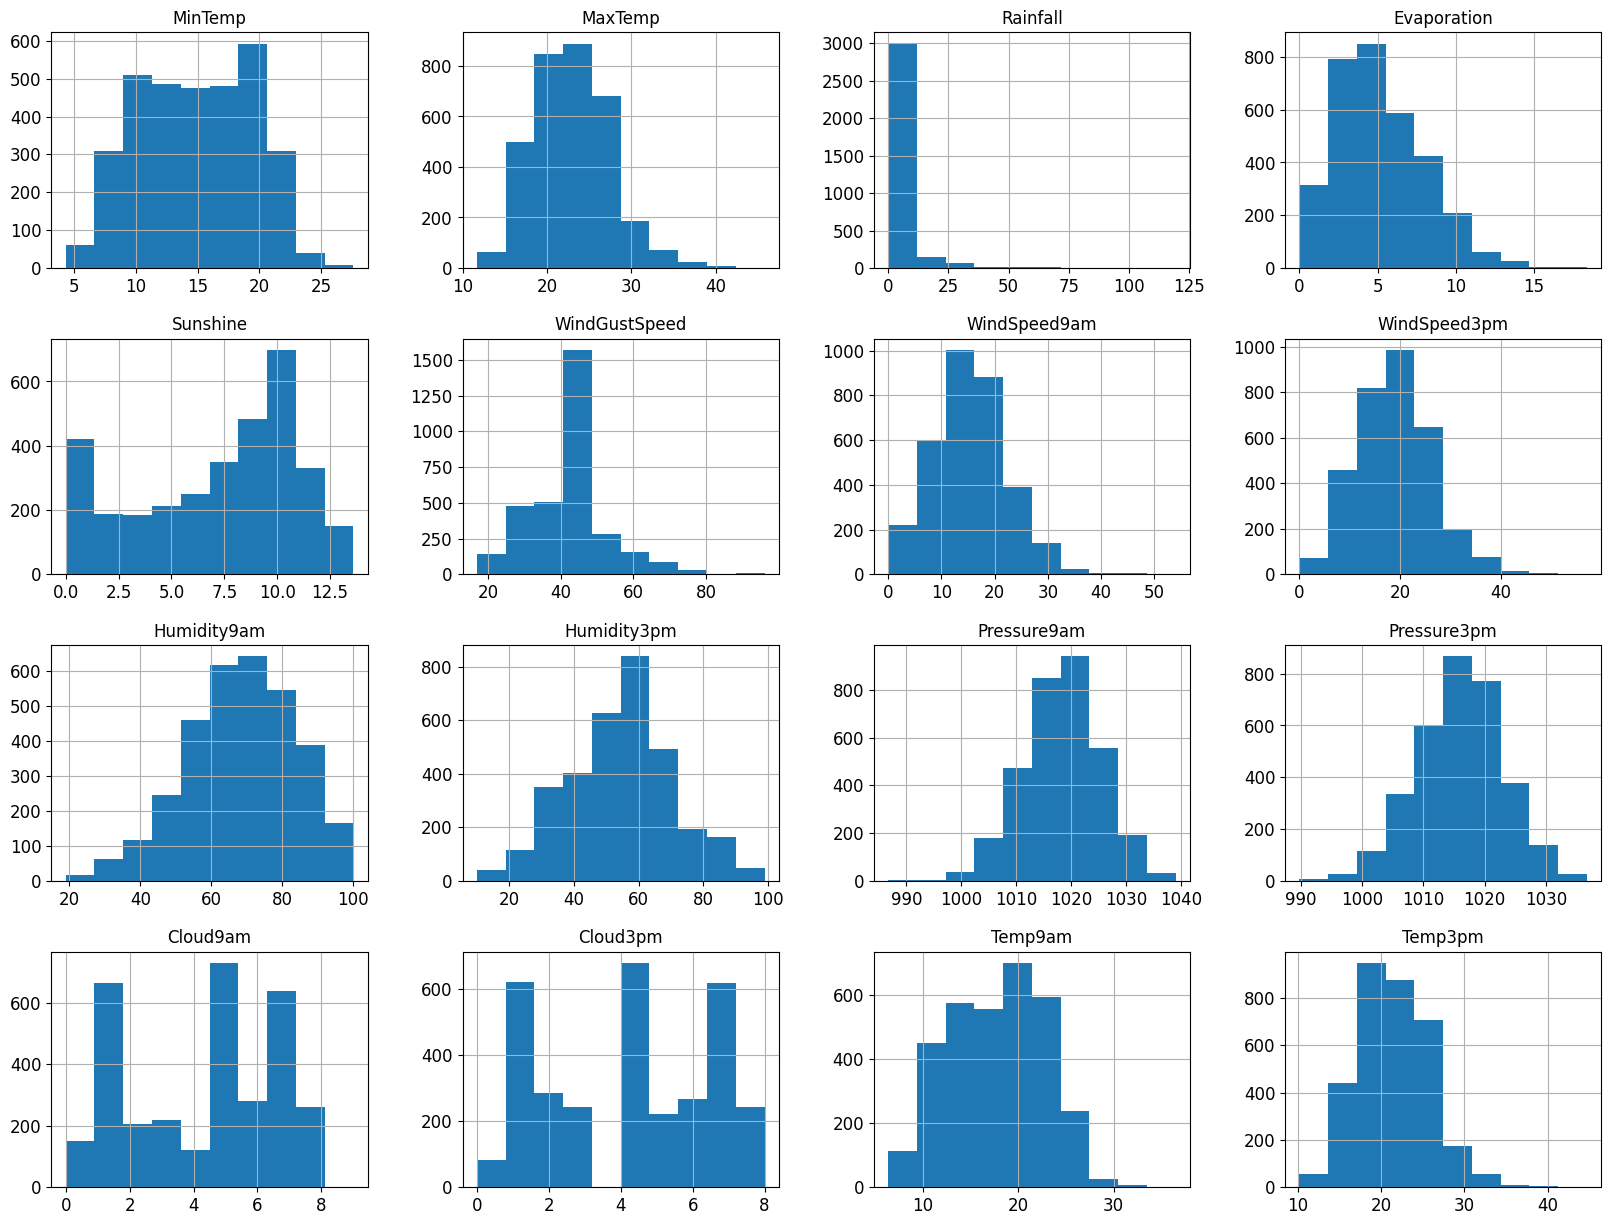

<Figure size 640x480 with 0 Axes>

In [14]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df.hist(figsize=(20,15));
plt.figure();

## Show correlations with RainTommorow

In [15]:
print('Pearson correlations with RainTommorow')
corr_matrix = df_processed.corr()
corr_matrix['RainTomorrow'].sort_values(ascending=False)

Pearson correlations with RainTommorow


RainTomorrow     1.000000
Humidity3pm      0.477580
Cloud3pm         0.415801
RainToday_Yes    0.346207
Cloud9am         0.338545
                   ...   
WindDir3pm_E    -0.106425
MaxTemp         -0.152525
Temp3pm         -0.190583
RainToday_No    -0.346207
Sunshine        -0.529112
Name: RainTomorrow, Length: 67, dtype: float64

## Analyze cross correlations

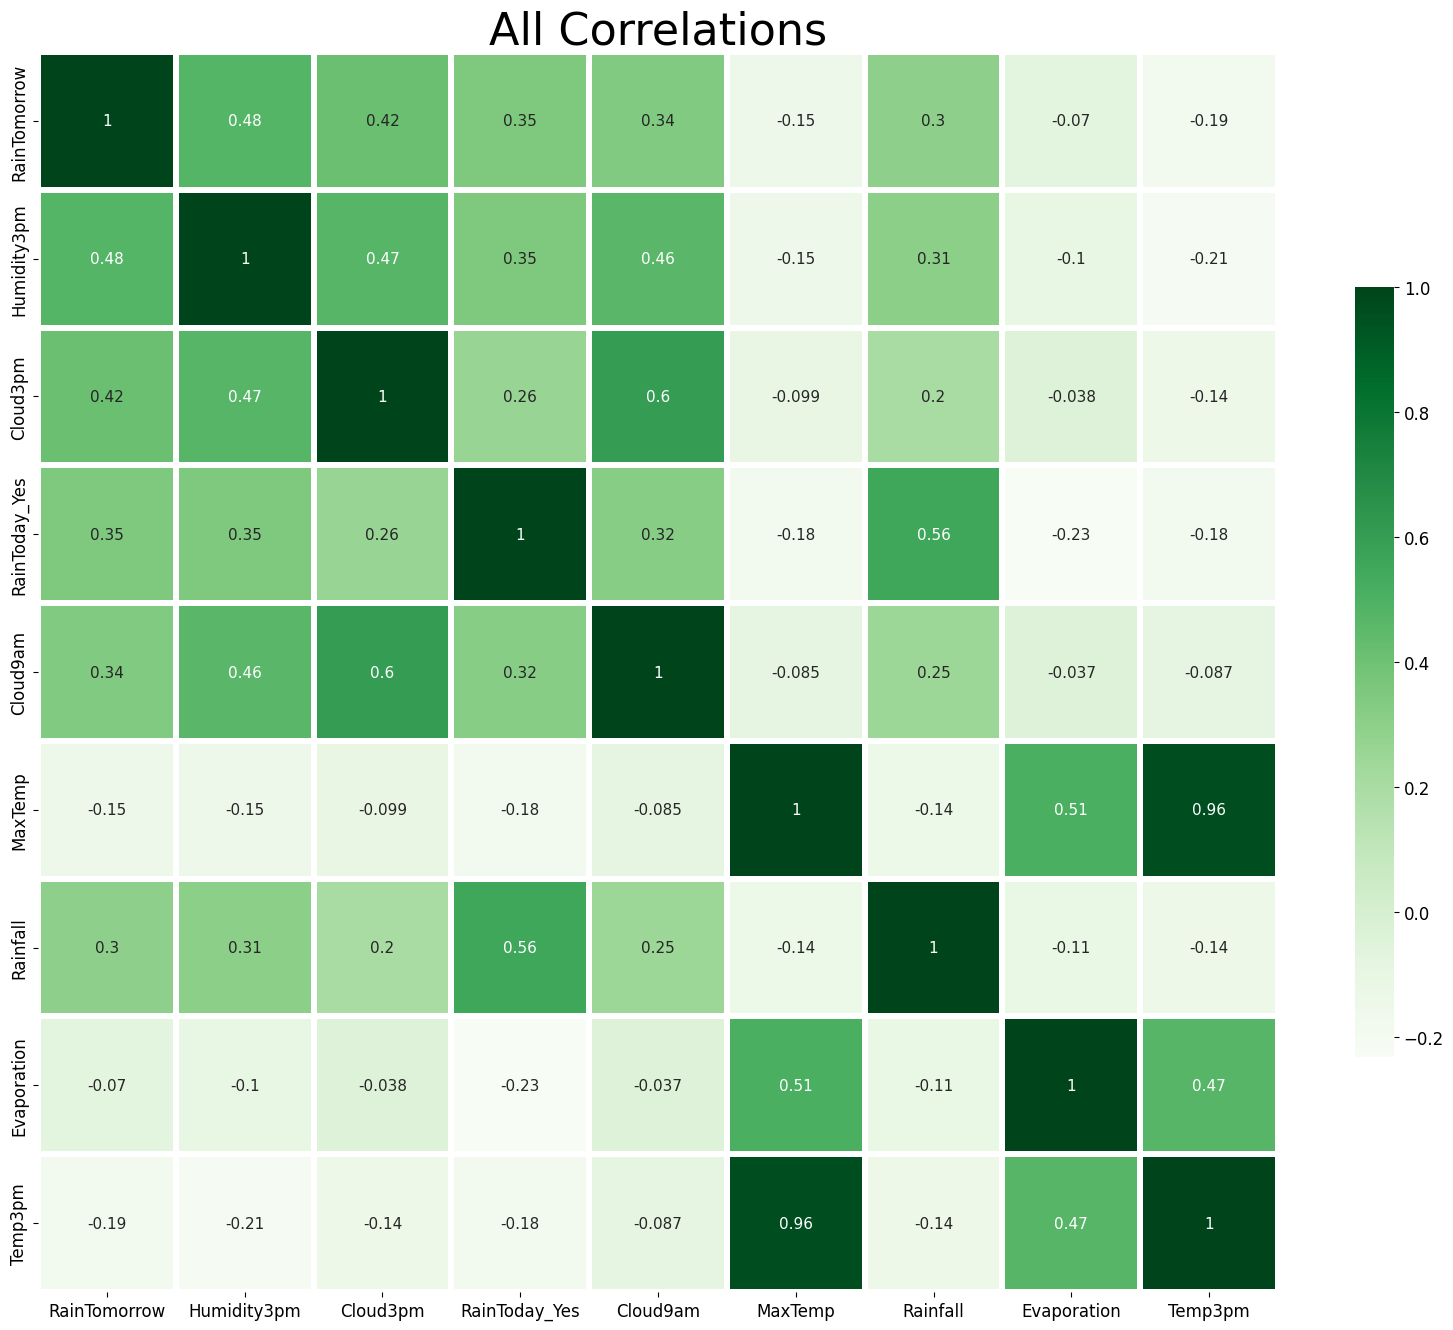

In [16]:
# Specify size and title for the visualization
f, axes = plt.subplots(figsize=(20, 20))
plt.title('All Correlations',fontsize=32)

# For the purpose of visualization, we'll use a different order for the features.
# We'll start with RainTommorow, to make it easier to compare all other features with it.
features = ['RainTomorrow','Humidity3pm','Cloud3pm',
            'RainToday_Yes','Cloud9am','MaxTemp','Rainfall','Evaporation','Temp3pm' ]

# Use Seaborn library to plot the correlation matrix as a heatmap
sns.heatmap(df_processed[features].corr(),
           linewidths = 3.0,
           square = True,
           cmap = 'Greens',
           linecolor='w',
           annot=True,
           annot_kws={'size':11},
           cbar_kws={'shrink': .5});


In [17]:
x_values = df_processed.drop(columns='RainTomorrow', axis=1)

In [18]:
y_values = df_processed['RainTomorrow']

# Linear Regression 

### We split the data for training and testing set to make it 20% for testing and 80% for Training

In [19]:
x_train, x_test, y_train, y_test =  train_test_split(x_values,y_values , random_state=10,test_size=0.2, shuffle=True)

In [20]:
# Create a linear regression model
regressor = LinearRegression()

In [21]:
# Fit the model using training data and labels
start = time()
regressor.fit(x_train, y_train);
end=time()
train_time = (end - start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

Model took 7,875.79 milliseconds to fit.


# Evaluate the model using the test dataset

In [22]:
# Evaluate the model's performance using test data and labels
score = regressor.score(x_test, y_test)
'Score: {}%'.format(int(round(score * 100)))

'Score: 43%'

In [23]:
predictions = regressor.predict(x_test)
LinearReg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
LinearReg_diff


,Actual value,Predicted value
3066,0.0,0.131838
2456,0.0,0.276185
1629,1.0,0.978189
838,1.0,0.287457
2506,0.0,0.132414
...,...,...
2632,1.0,0.264843
1725,0.0,0.175158
1158,1.0,0.706317
1661,0.0,0.173841


In [48]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2 = np.sqrt(metrics.mean_squared_error(y_test, predictions))
Report =  pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R²)'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})
Report

,Metric,Value
0,Mean Absolute Error (MAE),0.256318
1,Mean Squared Error (MSE),0.115721
2,R-squared (R²),0.340177


## Logistic regression

In [24]:
log_reg = LogisticRegression(solver='sag', C = 0.05, max_iter = 10000)
start = time()
log_reg.fit(x_train, np.ravel(y_train))
end = time()
train_time = (end - start) * 1000

# Score using the validation data.
score = log_reg.score(x_test, y_test)

print('Logistic regression model took {:.2f} milliseconds to fit.'.format(train_time))
print('Score on validation set: {:.0f}%'.format(score * 100))

Logistic regression model took 15152.95 milliseconds to fit.
Score on validation set: 84%


## Identify the class distribution in the dataset

Not Rained (Class 0): 2422
Rained (Class 1): 849


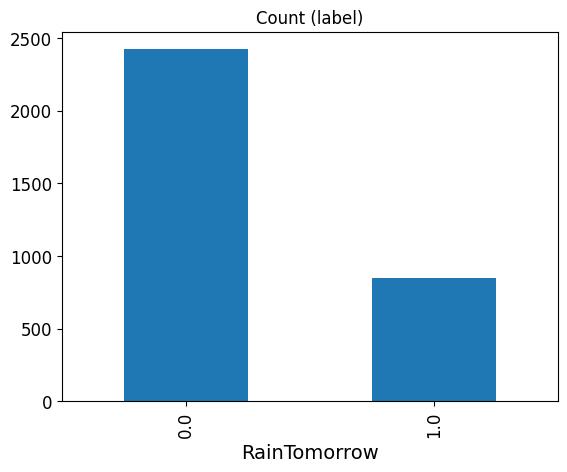

In [26]:
label_count = df_processed['RainTomorrow'].value_counts()
print('Not Rained (Class 0):', label_count[0])
print('Rained (Class 1):', label_count[1])

label_count.plot(kind = 'bar', title = 'Count (label)');

## Generate a confusion matrix

In [37]:
def c_matrix_graph(y, prediction):
    c_matrix = confusion_matrix(y, prediction)
    
    ax = plt.subplot()

    sns.set(font_scale = 1.2)
    sns.heatmap(c_matrix, annot = True, fmt = 'g', ax = ax)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Prediction', fontsize = 18);
    ax.set_ylabel('Actual', fontsize = 18);
    ax.xaxis.set_ticklabels(['Not Rained (0)', 'Rained (1)'], fontsize = 12, va = 'center');
    ax.yaxis.set_ticklabels(['Not Rained (0)', 'Rained (1)'], fontsize = 12, va = 'center');
    
print('The confusion matrix graphing function has been defined.')

The confusion matrix graphing function has been defined.


## Compute accuracy, precision, recall, and F1 score

In [30]:
def model_scores(y, prediction):
    acc = accuracy_score(y, prediction)
    print('Accuracy: {:.0f}%'.format(np.round(acc * 100)))
    
    precision = precision_score(y, prediction)
    print('Precision: {:.0f}%'.format(np.round(precision * 100)))
    
    recall = recall_score(y, prediction)
    print('Recall: {:.0f}%'.format(np.round(recall * 100)))
    
    f1 = f1_score(y, prediction)
    print('F1: {:.0f}%'.format(np.round(f1 * 100)))
    
print('The function to compute scores has been defined.')

The function to compute scores has been defined.


## Generate a ROC curve and compute the AUC

In [32]:
def roc(y, prediction_proba):
    fpr, tpr, thresholds = roc_curve(y, prediction_proba)
    
    plt.plot(fpr, tpr);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.0]);
    plt.title('ROC Curve');
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.grid(True);
    
    auc = roc_auc_score(y, prediction_proba)
    print('Area Under Curve: {:.2f}'.format(auc))
    
print('The function to generate a ROC curve and compute AUC has been defined.')

The function to generate a ROC curve and compute AUC has been defined.


## Generate a precision–recall curve and compute the average precision

In [34]:
def prc(y, prediction_proba):
    precision, recall, thresholds = precision_recall_curve(y, prediction_proba)
    
    plt.plot(recall, precision);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.0]);
    plt.title('Precision–Recall Curve');
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    plt.grid(True);
    
    ap = average_precision_score(y, prediction_proba)
    print('Average Precision: {:.2f}'.format(ap))
    
print('The function to generate a precision-recall curve and compute average precision has been defined.')

The function to generate a precision-recall curve and compute average precision has been defined.


## Evaluate the initial logistic regression model

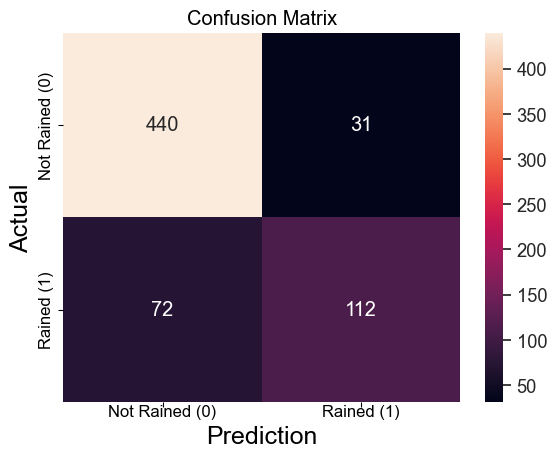

In [38]:
initial_predict = log_reg.predict(x_test)

c_matrix_graph(y_test, initial_predict)

In [39]:
model_scores(y_test, initial_predict)

Accuracy: 84%
Precision: 78%
Recall: 61%
F1: 69%


Area Under Curve: 0.90


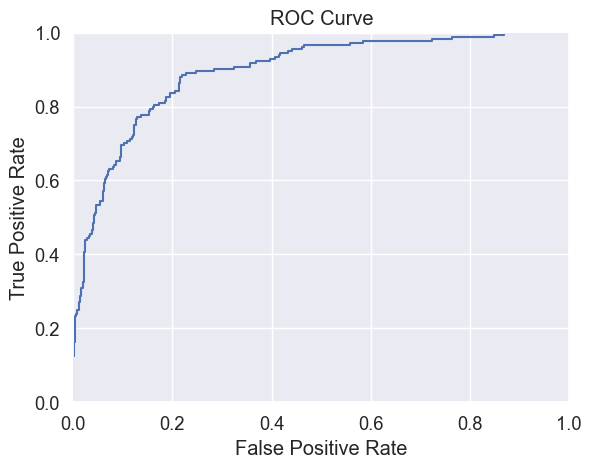

In [40]:
initial_predict_proba = log_reg.predict_proba(x_test)

roc(y_test, initial_predict_proba[:, 1])

Average Precision: 0.79


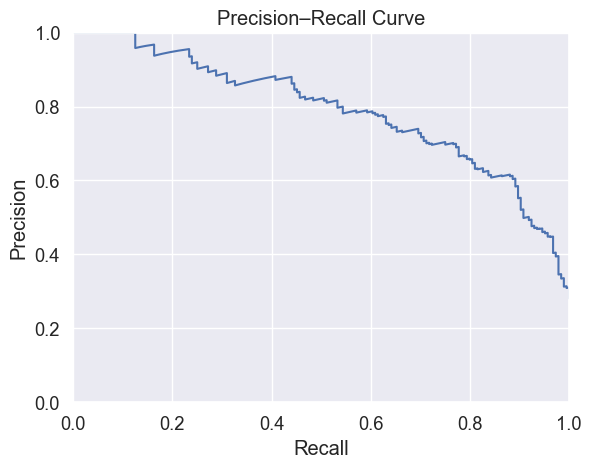

In [41]:
prc(y_test, initial_predict_proba[:, 1])